In [1]:
import os
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import supervision as sv

#!pip install -q "git+https://github.com/facebookresearch/segment-anything.git"
#!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

Нужно создать папку weights и положить туда файлик по с весами по ссылке

In [2]:
#!mkdir -p weights
#!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P weights

CHECKPOINT_PATH = os.path.join("weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

weights\sam_vit_h_4b8939.pth ; exist: True


In [3]:
IMAGE_PATH = "picture.jpg"
CHECKPOINT_PATH = os.path.join("weights", "sam_vit_h_4b8939.pth")

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [4]:
# Define model
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

# Define mask_generator
mask_generator = SamAutomaticMaskGenerator(sam)

# Define mask_annotator
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

print(sam.device.type)

cuda


In [5]:
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = [el for el in mask_generator.generate(image_rgb)
              if el["stability_score"] > 0.975]

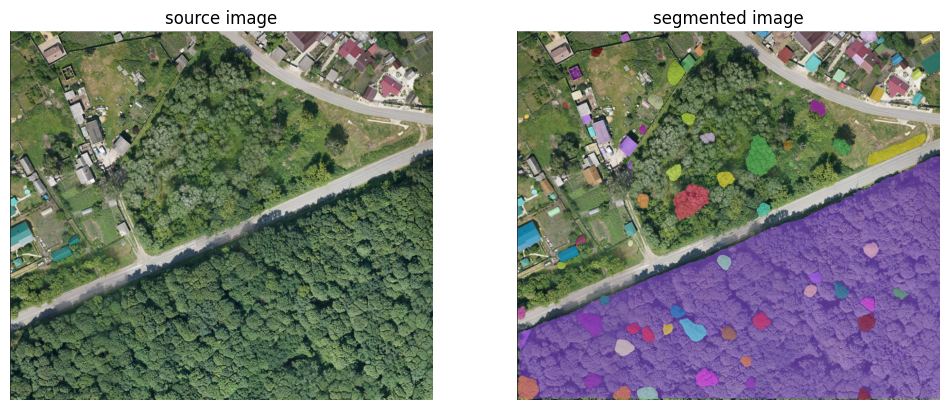

In [6]:
# Это для красивого вывода 

detections = sv.Detections.from_sam(sam_result=sam_result)
annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)